In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

2022-11-19 19:34:05.499228: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.__version__

'2.9.1'

## 8.2 TensorFlow and Keras

- Installing TensorFlow
- Loading images

In [3]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
#get the dataset

#git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

In [4]:
path = './clothing-dataset-small/train/t-shirt'
file = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
full_name = f'{path}/{file}'

In [5]:
img = load_img(full_name, target_size=(299,299))

In [6]:
#each one of the rows is a pixel with RGB values
x = np.array(img)
x.shape

(299, 299, 3)

In [7]:
# u =unsigned, so it goes to 0 to 255 integer that takes 8 bits or 1 byte.
x.dtype

dtype('uint8')

## 8.3 Pre-trained convulutional neural networks

- Imagenet dataset: https://www.image-net.org/
- Pretrained models: https://keras.io/api/applications/

In [8]:
from tensorflow.keras.applications.xception import Xception

#the input needs some preprocessing before predict
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow.keras.applications.xception import decode_predictions

In [9]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

2022-11-19 12:40:40.353147: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 12:40:40.360599: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 12:40:40.361267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 12:40:40.362512: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [10]:
X = np.array([x])
X = preprocess_input(X)

In [11]:
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804]],

       [[ 0.47450984,  0.4039216 , -0.1372549 ],
        [ 0.4666667 ,  0.39607847, -0.14509803],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [12]:
pred = model.predict(X)

2022-11-19 12:40:43.695261: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-19 12:40:44.327216: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-19 12:40:44.328171: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-19 12:40:44.328221: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-19 12:40:44.329211: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-19 12:40:44.329324: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [13]:
#1 image 1 thousand classes. Each value in the array is the probability that this
# particular image belongs to some class.

#to make sanse out of this output we need to know what are the clases for each one
#of the values of the array

pred.shape

(1, 1000)

In [14]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

## 8. Convolutional neural networks

## 8.5 Transfer Learning

- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [17]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32)

Found 3068 images belonging to 10 classes.


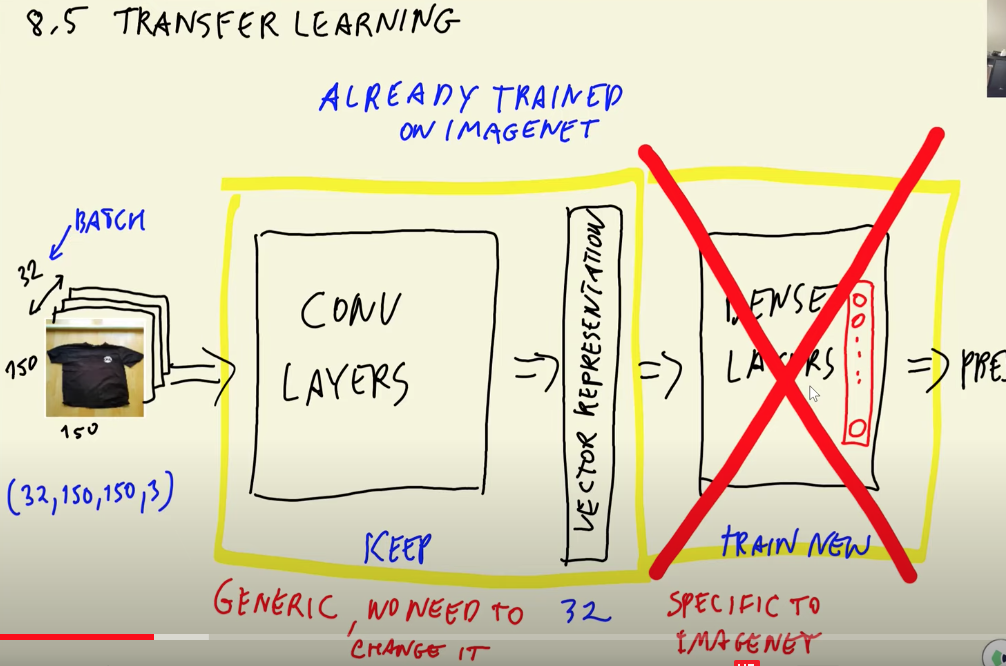

In [18]:
#it infers the names of the classes from the folder structure so 
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
X, y = next(train_ds)

In [20]:
#32 images size 150 x 150 RGB
X.shape

(32, 150, 150, 3)

In [21]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [22]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [23]:
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False)

Found 341 images belonging to 10 classes.


In [24]:
#we dont want to train this model
#we want to use it for extracting the vecto reresentation
#meaning that we train our model we don't want to change
#the convolutional layers (freeze conv layers)
base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3))

base_model.trainable=False

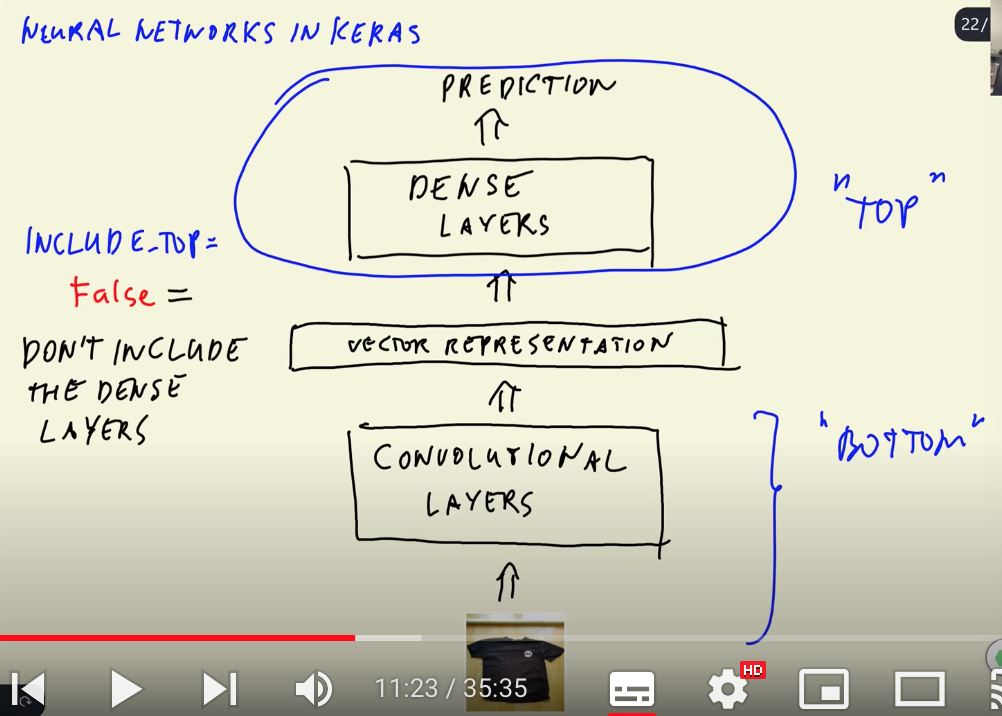

In [25]:
# create new top
#inputs what we fit in the data
#outputs what we call predict

inputs = keras.Input(shape=(150, 150, 3))

base = base_model (inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

# up to here what we didd was took a pretrained model, romoved the dense layers
# (include top false) and then we added our dense layer (outputs)


In [26]:
pred = model.predict(X)

1/1 [==============================] - 1s 1s/step


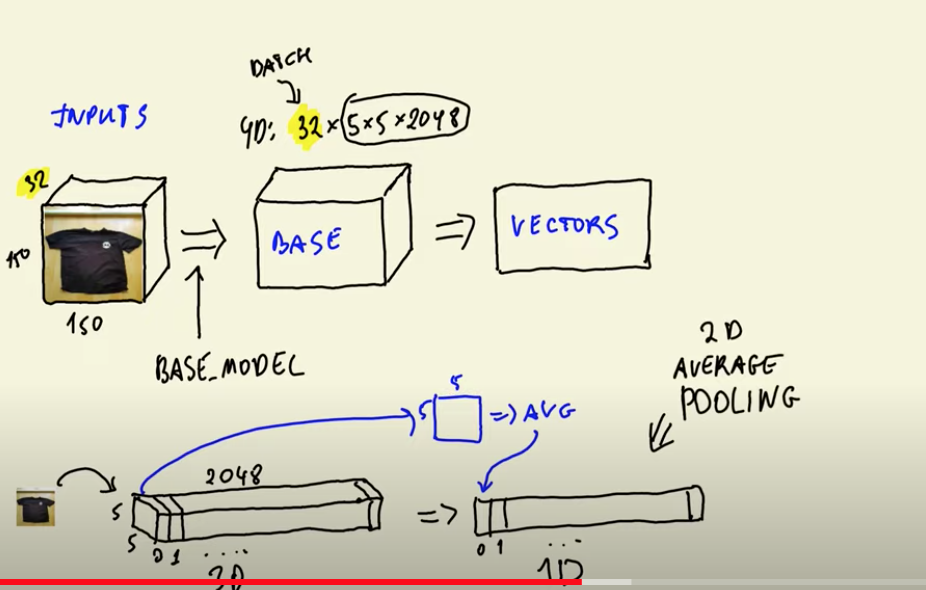

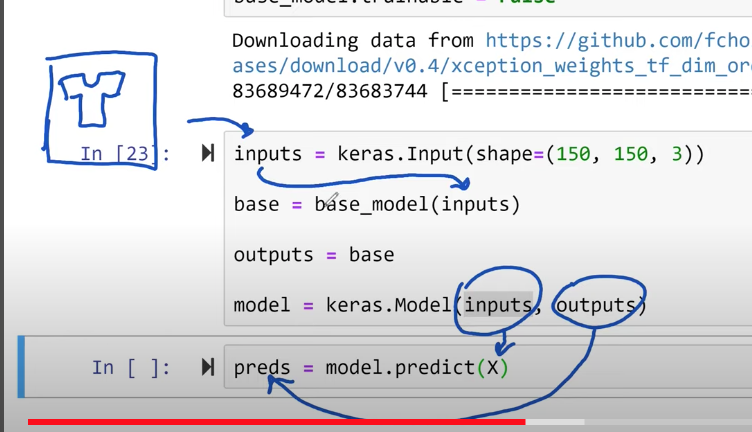

In [27]:
pred.shape

(32, 10)

The input is our shirt it goes from the inputs to the basemodel, the base model takes this as input and produces the three dimensional thing, then we pooling it turned into one dimensional vector by using pooling and then this give us our vector representation, then we add a dense layer to turn the vector representation into predictions and then the dimensionality of this is 10 because we have 10 classes and this is finally what goes to the output of the model. The output of the model is what we will have when we invooke predict and the input is the X

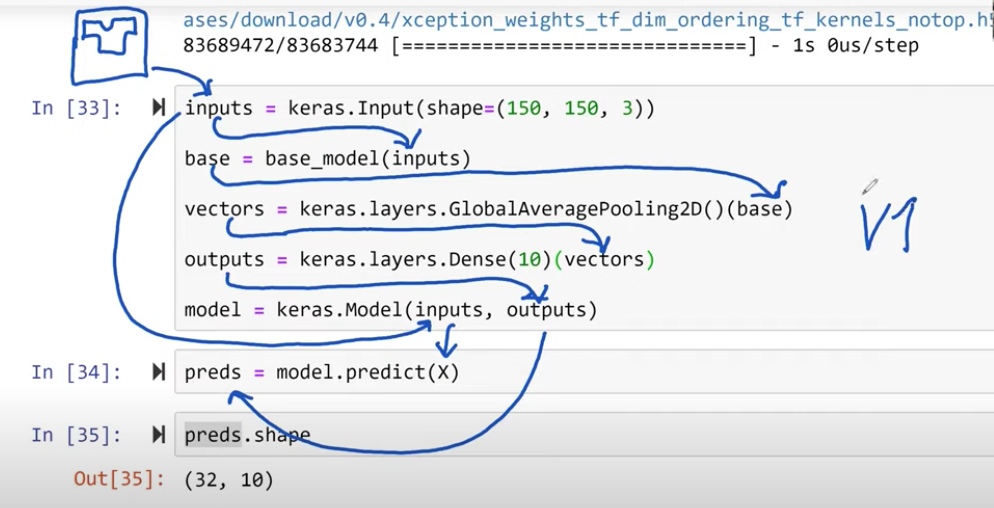

In [28]:
# we need to train the weights
#the optimizer needs to know how exactly it needs to change the
#weights. It needs to check that if it changes the weights are
#actually better. For this we will use the concept of loss.

#Loss tells us how good the model is.
learning_rate=0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

In [29]:
#categorical_crossentropy = for evaluating classification models. Specially multiple classification
#binary_crossentropy = binary classification
#mean_squared_error = regression problems

#logits: we have the dense layer, receive input we have the output layer and then we apply
#softmax which is called activation it takes its input and turns it
#into probability and this probability is called logits.
#This is the row output of the dense layer before we apply softmax

#if we have softmax, we have probabilities
#if we dont include softmax, we have row score
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [30]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [31]:
#epochs fit the model certain times 
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 18s 161ms/step - loss: 1.1921 - accuracy: 0.6776 - val_loss: 1.2563 - val_accuracy: 0.7185
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 0.5851 - accuracy: 0.8214 - val_loss: 0.8151 - val_accuracy: 0.7801
Epoch 3/10
96/96 [==============================] - 12s 123ms/step - loss: 0.3441 - accuracy: 0.8843 - val_loss: 0.8470 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.2697 - accuracy: 0.9032 - val_loss: 0.9610 - val_accuracy: 0.8035
Epoch 5/10
96/96 [==============================] - 12s 121ms/step - loss: 0.1691 - accuracy: 0.9390 - val_loss: 0.8635 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 12s 121ms/step - loss: 0.1098 - accuracy: 0.9632 - val_loss: 0.9275 - val_accuracy: 0.7977
Epoch 7/10
96/96 [==============================] - 12s 122ms/step - loss: 0.0969 - accuracy: 0.9658 - val_loss: 0.9007 - val_accuracy: 0.7918

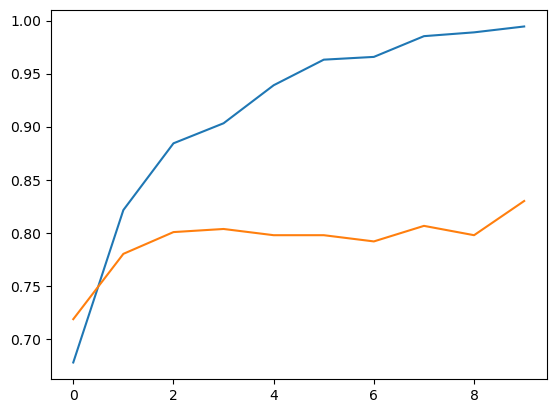

In [32]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='train')

## 8.6 Learning Rate

- What's the learning rate
- Trying different parameter values

Think about learning rate as how fast you can read?

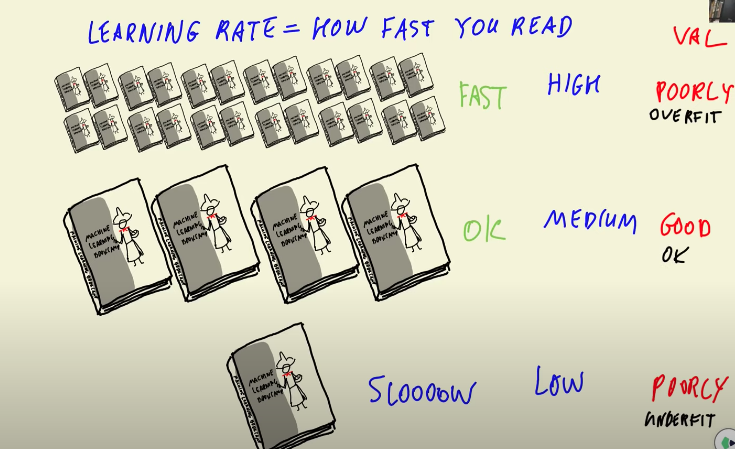

In [33]:
def make_model(learning_rate=0.01):
    base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3))

    base_model.trainable=False
    
    ##################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model (inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    ##################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

In [34]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 15s 131ms/step - loss: 2.0604 - accuracy: 0.2920 - val_loss: 1.6612 - val_accuracy: 0.4545
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 1.4466 - accuracy: 0.5450 - val_loss: 1.2850 - val_accuracy: 0.5777
Epoch 3/10
96/96 [==============================] - 12s 122ms/step - loss: 1.1794 - accuracy: 0.6242 - val_loss: 1.0949 - val_accuracy: 0.6481
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 1.0304 - accuracy: 0.6705 - val_loss: 0.9855 - val_accuracy: 0.6891
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.9330 - accuracy: 0.7001 - val_loss: 0.9056 - val_accuracy: 0.7097
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.8612 - accuracy: 0.7210 - val_loss: 0.8492 - val_accuracy: 0.7361
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.8058 - accuracy: 0.7405 - val_loss: 0.8103 - val_accuracy:

In [35]:
for lr, hist in scores.items():
    print(lr)
    print(hist)
    

0.0001
{'loss': [2.0604021549224854, 1.446600079536438, 1.1794217824935913, 1.0304136276245117, 0.9330411553382874, 0.8612275123596191, 0.805813193321228, 0.7616993188858032, 0.7240762114524841, 0.69228595495224], 'accuracy': [0.2920469343662262, 0.5449804663658142, 0.6241851449012756, 0.670469343662262, 0.7001304030418396, 0.7209908962249756, 0.7405475974082947, 0.7552151083946228, 0.7653194069862366, 0.7711864113807678], 'val_loss': [1.6612077951431274, 1.2850327491760254, 1.0949413776397705, 0.985498309135437, 0.9056388139724731, 0.8492293953895569, 0.8103079199790955, 0.7735119462013245, 0.7469403743743896, 0.7246666550636292], 'val_accuracy': [0.4545454680919647, 0.5777125954627991, 0.6480938196182251, 0.6891495585441589, 0.7096773982048035, 0.7360703945159912, 0.7360703945159912, 0.7624633312225342, 0.7536656856536865, 0.7565982341766357]}
0.001
{'loss': [1.1023958921432495, 0.6386518478393555, 0.5088549256324768, 0.4307050108909607, 0.3663721978664398, 0.32576367259025574, 0.287

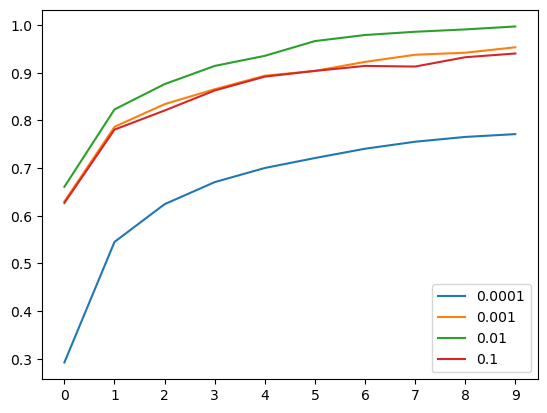

In [36]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=lr)
plt.xticks(np.arange(10))
plt.legend()

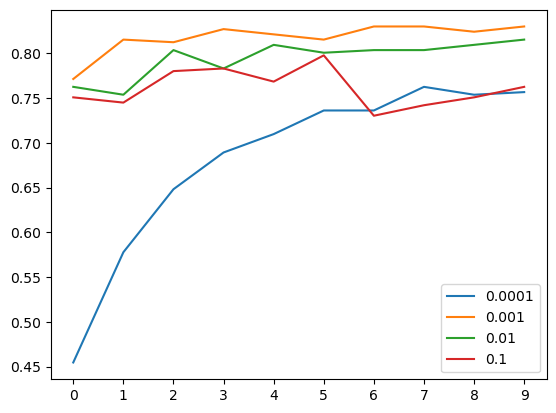

In [37]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
plt.xticks(np.arange(10))
plt.legend()

## Checkpointing

- Saving the best model only
- Training a model with callbacks

Checkpointing is saving our model after each iteration or when certain conditions are met.

Callbacks are some code we invoke after each epoch finishes

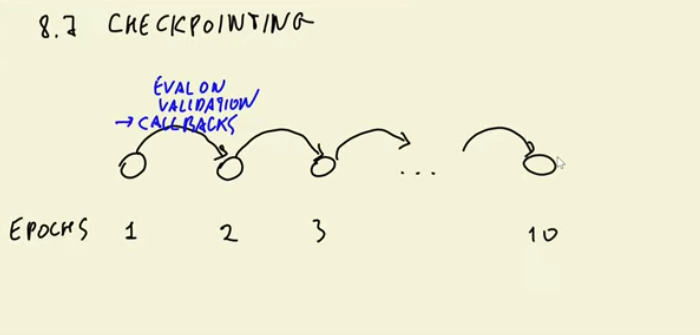

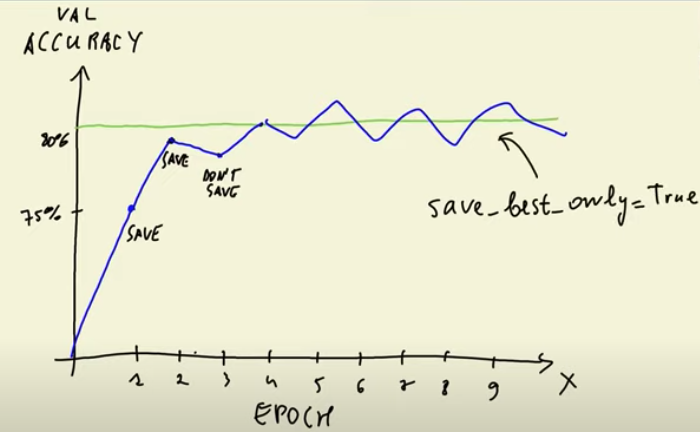

save_best_only: only saves de best model

In [38]:
#when we invoice this callback it will save the model in the below format
checkpoint=keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [39]:
learning_rate = 0.001
model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - 15s 135ms/step - loss: 1.0848 - accuracy: 0.6460 - val_loss: 0.7156 - val_accuracy: 0.7742
Epoch 2/10
96/96 [==============================] - 12s 125ms/step - loss: 0.6343 - accuracy: 0.7823 - val_loss: 0.6128 - val_accuracy: 0.7801
Epoch 3/10
96/96 [==============================] - 12s 125ms/step - loss: 0.5122 - accuracy: 0.8272 - val_loss: 0.5764 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 12s 126ms/step - loss: 0.4317 - accuracy: 0.8621 - val_loss: 0.5737 - val_accuracy: 0.8123
Epoch 5/10
96/96 [==============================] - 12s 125ms/step - loss: 0.3758 - accuracy: 0.8823 - val_loss: 0.5377 - val_accuracy: 0.8328
Epoch 6/10
96/96 [==============================] - 12s 125ms/step - loss: 0.3305 - accuracy: 0.9029 - val_loss: 0.5234 - val_accuracy: 0.8358
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.2894 - accuracy: 0.9224 - val_loss: 0.5315 - val_accuracy: 0.8035

## 8.8 Adding more layers

- Adding one inner dense layer
- Experimenting with different sizes of inner layer

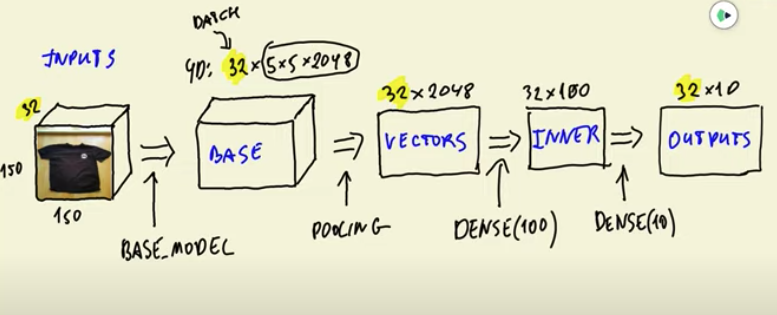

In [40]:
#activation: post processing of the output of the dense vector
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3))

    base_model.trainable=False
    
    ##################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model (inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner=keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    ##################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

In [41]:
learning_rate=0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 15s 131ms/step - loss: 1.1082 - accuracy: 0.6271 - val_loss: 0.7127 - val_accuracy: 0.7742
Epoch 2/10
96/96 [==============================] - 12s 121ms/step - loss: 0.6302 - accuracy: 0.7865 - val_loss: 0.6222 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - 12s 122ms/step - loss: 0.5046 - accuracy: 0.8292 - val_loss: 0.5967 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 0.4300 - accuracy: 0.8641 - val_loss: 0.5841 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3745 - accuracy: 0.8915 - val_loss: 0.5596 - val_accuracy: 0.8270
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3285 - accuracy: 0.9029 - val_loss: 0.5460 - val_accuracy: 0.8270
Epoch 7/10
96/96 [==============================] - 12s 121ms/step - loss: 0.2891 - accuracy: 0.9257 - val_loss: 0.5549 - val_accuracy: 0.8

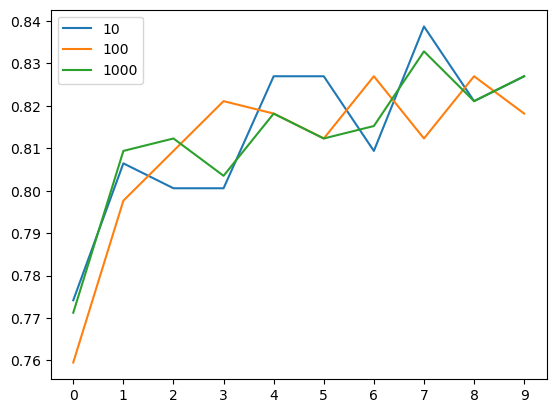

In [42]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=size)
plt.xticks(np.arange(10))
plt.legend()

## 8.9 Regularization and Dropout

- Regularizing by freezing a part of the network
- Adding fropout to our model
- Experimenting with different values

Dropout is one of the possible ways of regularizing a neural network to not let overfit the model.

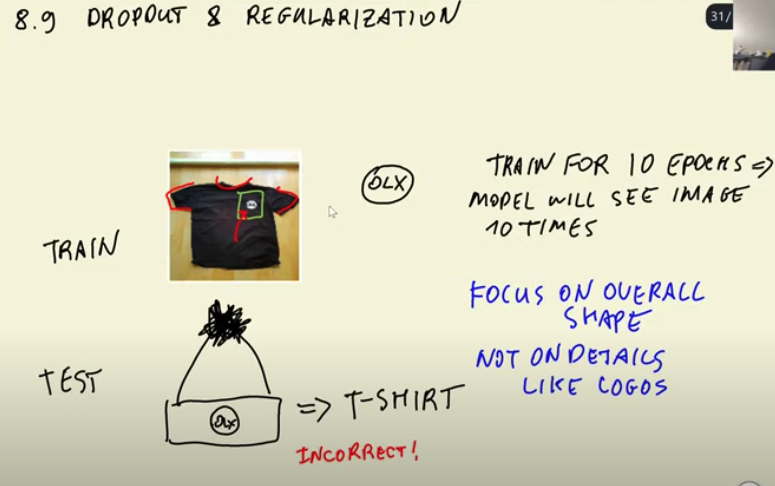

The idea of the dropout is to hide a part of the input. It applies this idea to inner layers not the image itself.

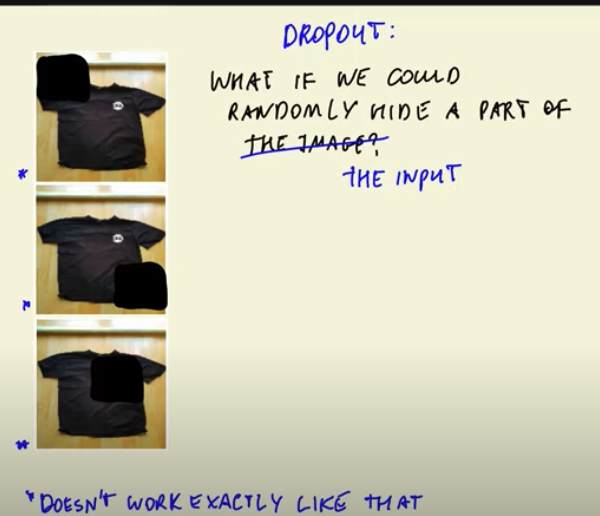

What it really dropped out is an neuron of the inner layer and for each iteration a different output is frozen. We hide a part of the network

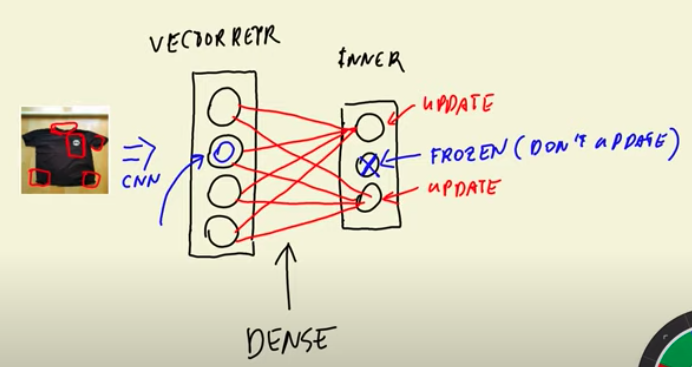
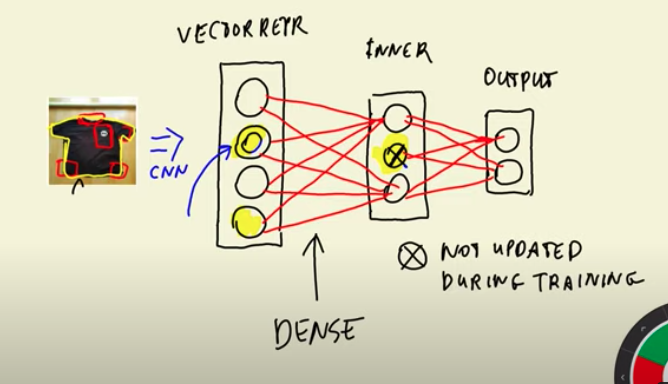

In [43]:
#activation: post processing of the output of the dense vector
#droprate: how much of the network will randomly freeze
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3))

    base_model.trainable=False
    
    ##################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model (inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner=keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    ##################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

In [44]:
learning_rate=0.001
size=10

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
    model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 15s 129ms/step - loss: 1.7794 - accuracy: 0.3690 - val_loss: 1.4582 - val_accuracy: 0.4604
Epoch 2/30
96/96 [==============================] - 12s 122ms/step - loss: 1.3490 - accuracy: 0.5248 - val_loss: 1.2166 - val_accuracy: 0.5572
Epoch 3/30
96/96 [==============================] - 12s 121ms/step - loss: 1.0655 - accuracy: 0.6278 - val_loss: 0.9796 - val_accuracy: 0.6774
Epoch 4/30
96/96 [==============================] - 12s 123ms/step - loss: 0.8424 - accuracy: 0.7112 - val_loss: 0.8361 - val_accuracy: 0.7390
Epoch 5/30
96/96 [==============================] - 12s 121ms/step - loss: 0.7030 - accuracy: 0.7669 - val_loss: 0.8091 - val_accuracy: 0.7273
Epoch 6/30
96/96 [==============================] - 12s 122ms/step - loss: 0.6133 - accuracy: 0.7901 - val_loss: 0.7407 - val_accuracy: 0.7625
Epoch 7/30
96/96 [==============================] - 12s 121ms/step - loss: 0.5349 - accuracy: 0.8191 - val_loss: 0.7120 - val_accuracy: 0.

Epoch 28/30
96/96 [==============================] - 12s 122ms/step - loss: 0.5383 - accuracy: 0.8106 - val_loss: 0.6940 - val_accuracy: 0.7537
Epoch 29/30
96/96 [==============================] - 12s 123ms/step - loss: 0.5269 - accuracy: 0.8077 - val_loss: 0.7213 - val_accuracy: 0.7361
Epoch 30/30
96/96 [==============================] - 12s 122ms/step - loss: 0.4985 - accuracy: 0.8220 - val_loss: 0.7066 - val_accuracy: 0.7654


0.5
Epoch 1/30
96/96 [==============================] - 15s 131ms/step - loss: 1.8371 - accuracy: 0.3445 - val_loss: 1.3683 - val_accuracy: 0.5982
Epoch 2/30
96/96 [==============================] - 12s 122ms/step - loss: 1.5620 - accuracy: 0.4257 - val_loss: 1.1954 - val_accuracy: 0.5806
Epoch 3/30
96/96 [==============================] - 12s 122ms/step - loss: 1.4640 - accuracy: 0.4465 - val_loss: 1.1561 - val_accuracy: 0.5865
Epoch 4/30
96/96 [==============================] - 12s 121ms/step - loss: 1.3855 - accuracy: 0.4638 - val_loss: 1.0769 - val_accurac

Epoch 25/30
96/96 [==============================] - 12s 123ms/step - loss: 1.9090 - accuracy: 0.3022 - val_loss: 1.5381 - val_accuracy: 0.3666
Epoch 26/30
96/96 [==============================] - 12s 123ms/step - loss: 1.9300 - accuracy: 0.2950 - val_loss: 1.5895 - val_accuracy: 0.3636
Epoch 27/30
96/96 [==============================] - 12s 121ms/step - loss: 1.9175 - accuracy: 0.3022 - val_loss: 1.5583 - val_accuracy: 0.3607
Epoch 28/30
96/96 [==============================] - 12s 122ms/step - loss: 1.9370 - accuracy: 0.2940 - val_loss: 1.5692 - val_accuracy: 0.3578
Epoch 29/30
96/96 [==============================] - 12s 123ms/step - loss: 1.9411 - accuracy: 0.2950 - val_loss: 1.5474 - val_accuracy: 0.3666
Epoch 30/30
96/96 [==============================] - 12s 122ms/step - loss: 1.9371 - accuracy: 0.2901 - val_loss: 1.5925 - val_accuracy: 0.3607




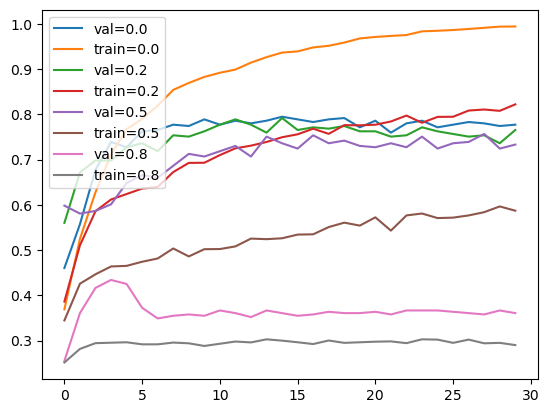

In [45]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=f'val={droprate}')
    plt.plot(hist['accuracy'], label=f'train={droprate}')

plt.legend()

## 8.10 Data augmentation 

Generate 10 more diferent images

You can combine them the below image transformations.

Flip:
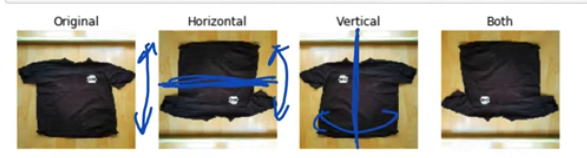

Rotation:
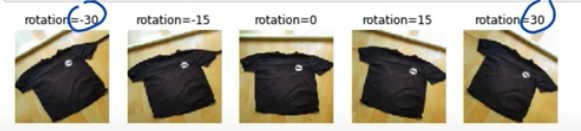

Height shifting:
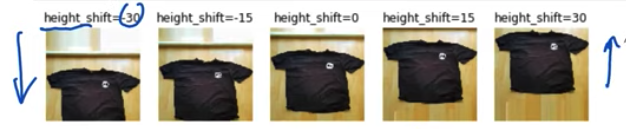

Width shifting:
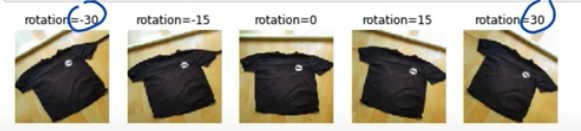

Shear:
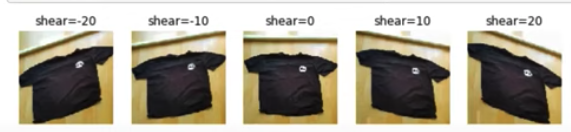

Zoom_x:
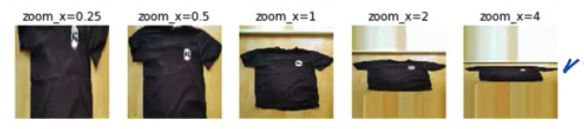

In [47]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32)

val_gen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


How do I know which parameters do I need to choose?

- Use your own judgement

    Images upside down? make sense? No, because all our images in our dataset are positioned correctly. If we dont expect to have t-shirts upside down when we apply the model then we dont need to generate this kind of augmentations. but fertical flip, makes sense since clothes are usually symmetrical


- Look at the dataset

    - what kind of variations do we have?

    - Look at your images and ask objects always center (rotate, shift)
    
- Tune it as a hyperparameter

    Treat is as should we add another layer, drop it, add rotation or not? train it for different epochs and see if your validation improves or not with this agumentation.
    
    - If improves significatively, use it.
    - Do not improve, do not use it.
    - Same? train for more epochs
    - Repeat
    - if you don't see an improvement do not use it.
    
In validation dataset we do not use any augmentation. We can tihnk of f them as the images that uploads the user to our website they will not use keras to first rotate them and them upload, they will just take a picture and upload it. That's the reson we leave it untouched.

In [48]:
learning_rate=0.001
size=10
droprate=0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)
    
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 27s 254ms/step - loss: 1.8060 - accuracy: 0.3739 - val_loss: 1.3805 - val_accuracy: 0.5630
Epoch 2/50
96/96 [==============================] - 24s 248ms/step - loss: 1.4879 - accuracy: 0.4762 - val_loss: 1.1658 - val_accuracy: 0.6540
Epoch 3/50
96/96 [==============================] - 24s 247ms/step - loss: 1.4002 - accuracy: 0.5108 - val_loss: 1.0877 - val_accuracy: 0.6774
Epoch 4/50
96/96 [==============================] - 24s 247ms/step - loss: 1.3268 - accuracy: 0.5271 - val_loss: 1.0002 - val_accuracy: 0.7155
Epoch 5/50
96/96 [==============================] - 24s 247ms/step - loss: 1.2662 - accuracy: 0.5645 - val_loss: 0.9527 - val_accuracy: 0.7067
Epoch 6/50
96/96 [==============================] - 24s 246ms/step - loss: 1.2381 - accuracy: 0.5802 - val_loss: 0.9217 - val_accuracy: 0.7126
Epoch 7/50
96/96 [==============================] - 24s 247ms/step - loss: 1.2140 - accuracy: 0.5870 - val_loss: 0.9136 - val_accuracy: 0.7097

Note that the CPU generate augmentation and then the GPU fit the model at each iteration
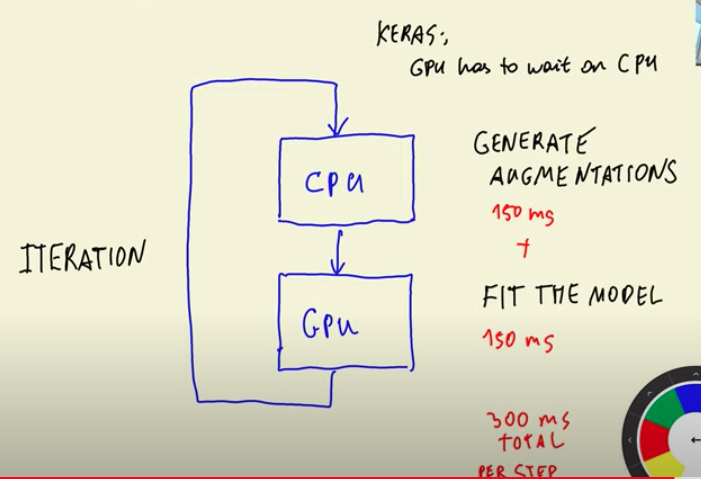

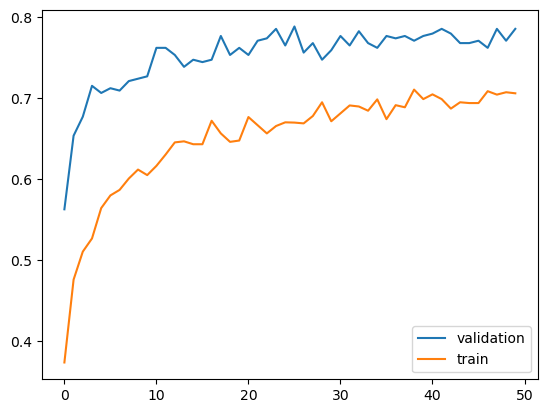

In [51]:
hist = history.history

plt.plot(hist['val_accuracy'], label='validation')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

- Train a 299x299 model

In [57]:
#activation: post processing of the output of the dense vector
#droprate: how much of the network will randomly freeze
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(input_size, input_size, 3))

    base_model.trainable=False
    
    ##################################################
    
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model (inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner=keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    ##################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

In [58]:
input_size=299

In [59]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32)

val_gen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [60]:
#when we invoice this callback it will save the model in the below format
checkpoint=keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate=0.001
size=10
droprate=0.2

model = make_model(
    input_size=299,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)
    
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 67s 675ms/step - loss: 1.4091 - accuracy: 0.5424 - val_loss: 0.9199 - val_accuracy: 0.7595
Epoch 2/50
96/96 [==============================] - 63s 650ms/step - loss: 0.9383 - accuracy: 0.6842 - val_loss: 0.6919 - val_accuracy: 0.8065
Epoch 3/50
96/96 [==============================] - 62s 649ms/step - loss: 0.7955 - accuracy: 0.7295 - val_loss: 0.5933 - val_accuracy: 0.8328
Epoch 4/50
96/96 [==============================] - 63s 652ms/step - loss: 0.7236 - accuracy: 0.7565 - val_loss: 0.5256 - val_accuracy: 0.8534
Epoch 5/50
96/96 [==============================] - 62s 644ms/step - loss: 0.6553 - accuracy: 0.7744 - val_loss: 0.4939 - val_accuracy: 0.8504
Epoch 6/50
96/96 [==============================] - 62s 646ms/step - loss: 0.6250 - accuracy: 0.7777 - val_loss: 0.4648 - val_accuracy: 0.8622
Epoch 7/50
96/96 [==============================] - 62s 646ms/step - loss: 0.5936 - accuracy: 0.7956 - val_loss: 0.4486 - val_accuracy: 0.8592

## 8.12 Using the model

- Loading the model
- Evaluating the model
- Getting predictions

In [2]:
model = keras.models.load_model('xception_v4_12_0.886.h5')

2022-11-19 19:38:22.613636: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 19:38:22.619992: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 19:38:22.620613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 19:38:22.621558: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import load_img

In [19]:
test_gen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False)

Found 372 images belonging to 10 classes.


In [20]:
model.evaluate(test_ds)

12/12 [==============================] - 3s 206ms/step - loss: 0.3186 - accuracy: 0.9059


[0.3185511529445648, 0.9059139490127563]

https://machinelearningmastery.com/cross-entropy-for-machine-learning/

In [38]:
path = './clothing-dataset-small/train/pants'
file = '041cea74-d96a-45ff-a8e2-d311ee0f21d8.jpg'
full_name = f'{path}/{file}'

In [39]:
img = load_img(full_name, target_size=(299,299))

In [40]:
x = np.array(img)
X=np.array([x])
X.shape

(1, 299, 299, 3)

In [41]:
X = preprocess_input(X)

In [42]:
pred = model.predict(X)

1/1 [==============================] - 0s 21ms/step


In [43]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [44]:
dict(zip(classes, pred[0]))

{'dress': -5.5091343,
 'hat': -6.583432,
 'longsleeve': 0.53385586,
 'outwear': -0.5085403,
 'pants': 7.398154,
 'shirt': -0.20781851,
 'shoes': -7.688733,
 'shorts': 2.053058,
 'skirt': -2.0752673,
 't-shirt': -1.69988}